# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [157]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
pd.set_option('display.max_columns', None)
import glob
import datetime
import os
from io import StringIO
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [158]:
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [159]:
all_sl_files = glob.glob(DATA_FOLDER + r'/ebola/sl_data/*.csv')

frames = []

for f in all_sl_files:
    data = None
    
    with open(f) as file:
        data = StringIO('\n'.join([l for l in file if '%' not in l]))

    new_frame = pd.read_csv(data,
                           parse_dates=['date'], thousands=',',
                           na_values=['Nr', '-', 'NR'])
    frames.append(new_frame)
    
sl = pd.concat(frames)
sl_newcases = ['new_suspected', 'new_probable', 'new_confirmed']
sl_deaths = ['death_suspected', 'death_probable', 'death_confirmed']

In [191]:
def compute_daily_averages(df, variable_column_name, variables_to_average, date_column_name):
    df_filtered = df[(df[variable_column_name].isin(variables_to_average))]
    di = pd.DatetimeIndex(df_filtered[date_column_name])
    g = df_filtered.groupby([di.month])
    ndays = g[date_column_name].nunique()
    
    avg_df = g.sum().div(ndays, axis='rows')
    avg_df.index.names = ['Month']
    
    return avg_df.dropna(axis=1, how='all')

In [192]:
sl_avg_new_case = compute_daily_averages(sl, 'variable', sl_newcases, 'date')
sl_avg_new_case

,Bo,Bombali,Bonthe,Kailahun,Kambia,Kenema,Koinadugu,Kono,Moyamba,National,Port Loko,Pujehun,Tonkolili,Western area,Western area rural,Western area urban
Month,,,,,,,,,,,,,,,,
8,1.800000,2.150000,0.000000,5.100000,0.000000,8.700000,0.250000,0.000000,0.300000,25.150000,3.150000,0.200000,0.850000,NaN,1.650000,2.500000
9,2.000000,6.724138,0.068966,2.448276,0.620690,3.931034,0.000000,0.965517,1.965517,40.689655,8.275862,0.482759,2.482759,NaN,5.241379,7.620690
10,4.178571,13.357143,0.071429,0.892857,0.714286,4.321429,1.214286,1.500000,1.750000,70.928571,8.964286,0.535714,5.714286,11.464286,7.892857,9.357143
11,3.380952,11.428571,0.190476,0.380952,1.476190,0.619048,2.476190,3.190476,2.000000,75.238095,12.428571,0.285714,5.000000,NaN,11.809524,23.904762
12,1.400000,4.800000,0.000000,0.000000,1.200000,0.000000,0.200000,1.400000,0.600000,41.000000,14.200000,0.000000,0.600000,NaN,5.200000,11.400000


In [162]:
sl_avg_new_case_sum = sl_avg_new_case.drop('National', axis = 1).sum(axis = 1)


In [163]:
sl_avg_case_SN = pd.concat([sl_avg_new_case['National'], sl_avg_new_case_sum], axis =1)
sl_avg_case_SN

,National,0
date,,
8,25.150000,26.650000
9,40.689655,42.827586
10,70.928571,71.928571
11,75.238095,78.571429
12,41.000000,41.000000


In [164]:
sl_avg_deaths = compute_daily_averages(sl, 'variable', sl_deaths, 'date')
sl_avg_deaths_sum = sl_avg_deaths.drop('National', axis = 1).sum(axis = 1)
sl_avg_deaths_SN = pd.concat([sl_avg_deaths['National'], sl_avg_deaths_sum], axis =1)

In [165]:
all_files = glob.glob(DATA_FOLDER + r'/ebola/liberia_data/*.csv')

frames = []

for f in all_files:
    new_frame = pd.read_csv(f)
    frames.append(new_frame)
    
lib = pd.concat(frames)
lib_deaths = ['Total death/s in confirmed, probable, suspected cases']
lib_newcases = ['Newly reported contacts']

In [166]:
compute_daily_averages(lib, 'Variable', lib_newcases, 'Date')

,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County
Date,,,,,,,,,,,,,,,,
6,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,9.285714,0.000000,0.000000,17.857143,27.142857,0.000000,0.000000,0.000000,0.000000
7,0.000000,2.818182,0.00,0.000000,0.000000,0.0,0.000000,10.909091,0.000000,0.000000,7.272727,21.000000,0.000000,0.000000,0.000000,0.000000
8,1.222222,19.111111,NaN,1.111111,0.000000,0.0,NaN,12.000000,10.111111,NaN,69.777778,129.222222,14.111111,1.111111,0.666667,0.000000
9,19.416667,7.291667,0.00,4.916667,0.458333,0.0,0.833333,9.000000,37.125000,0.000000,149.416667,246.291667,16.916667,0.458333,0.000000,0.458333
10,5.840000,8.400000,0.24,1.320000,6.560000,0.4,0.840000,4.560000,12.280000,0.000000,160.840000,205.640000,2.120000,0.000000,0.920000,1.320000
11,0.733333,1.866667,0.00,3.200000,16.000000,0.0,0.333333,2.600000,13.133333,2.266667,100.933333,139.533333,0.000000,0.000000,0.000000,4.533333
12,0.000000,1.777778,0.00,1.222222,3.111111,0.0,0.000000,0.000000,4.222222,0.000000,37.444444,48.000000,0.000000,0.000000,0.000000,0.222222


In [167]:
compute_daily_averages(lib, 'Variable', lib_deaths, 'Date')



,Bomi County,Bong County,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County
Date,,,,,,,,,,,,,,,,
6,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,17.142857,0.571429,0.000000,13.142857,32.000000,0.000000,0.000000,0.000000,0.000000
7,0.909091,1.545455,0.000000,0.000000,0.000000,0.181818,0.000000,47.454545,2.181818,0.000000,42.181818,94.454545,0.000000,0.000000,0.000000,0.000000
8,16.555556,26.000000,NaN,2.888889,5.111111,0.777778,NaN,202.888889,39.111111,13.333333,186.222222,518.111111,23.222222,1.111111,0.888889,0.000000
9,49.250000,64.250000,0.000000,21.708333,12.291667,1.916667,2.708333,360.750000,171.166667,4.166667,624.333333,1417.291667,95.666667,5.166667,3.000000,0.916667
10,66.608696,121.782609,4.086957,41.565217,23.869565,3.000000,31.217391,423.130435,324.130435,65.869565,1057.913043,2387.217391,103.521739,6.478261,7.652174,5.130435
11,85.000000,77.000000,3.000000,50.000000,43.000000,3.000000,22.000000,346.000000,516.000000,14.000000,1465.000000,2700.000000,44.000000,8.000000,14.000000,10.000000


In [168]:
lib_avg_new_case = compute_daily_averages(lib, 'Variable', lib_newcases, 'Date')
lib_avg_new_case_sum = lib_avg_new_case.drop('National', axis = 1).sum(axis = 1)
lib_avg_new_case_SN = pd.concat([lib_avg_new_case['National'], lib_avg_new_case_sum], axis =1)
lib_avg_new_case_SN

,National,0
Date,,
6,27.142857,27.142857
7,21.000000,21.000000
8,129.222222,129.222222
9,246.291667,246.291667
10,205.640000,205.640000
11,139.533333,145.600000
12,48.000000,48.000000


In [169]:
lib_avg_deaths = compute_daily_averages(lib, 'Variable', lib_deaths, 'Date')
lib_avg_deaths_sum = lib_avg_deaths.drop('National', axis = 1).sum(axis = 1)
lib_avg_deaths_SN = pd.concat([lib_avg_deaths['National'], lib_avg_deaths_sum], axis =1)
lib_avg_deaths_SN

,National,0
Date,,
6,32.000000,30.857143
7,94.454545,94.454545
8,518.111111,518.111111
9,1417.291667,1417.291667
10,2387.217391,2285.956522
11,2700.000000,2700.000000


In [170]:
all_files = glob.glob(DATA_FOLDER + r'/ebola/guinea_data/*.csv')

frames = []

for f in all_files:
    new_frame = pd.read_csv(f)
    frames.append(new_frame)
    
guinea = pd.concat(frames)
#not sure whether to include "New deaths registered among health workers"
guinea_deaths = ['New deaths registered']
#not sure whether to include "New cases of confirmed among health workers"
guinea_newcases = ['New cases of suspects', 'New cases of probables', 'New cases of confirmed']

In [171]:
g2 =guinea[guinea.Description.isin(guinea_newcases + guinea_deaths)]

In [172]:
for c in guinea.columns.difference(['Date', 'Description']):
    g2[c] = g2[c].astype(float)

In [173]:
compute_daily_averages(g2, 'Description', guinea_newcases, 'Date')

,Boffa,Conakry,Coyah,Dabola,Dalaba,Dinguiraye,Dubreka,Forecariah,Gueckedou,Kerouane,Kindia,Kissidougou,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
Date,,,,,,,,,,,,,,,,,,,,,,
8,0.0,2.800,NaN,0.0,NaN,0.0,1.200,NaN,5.2000,NaN,NaN,0.0,0.0,NaN,14.200,0.200,0.2,0.2,0.0000,0.0,25.800,1.8000
9,NaN,2.875,0.3125,NaN,0.25,NaN,0.125,0.3125,2.5625,0.6875,0.0625,NaN,NaN,NaN,9.875,2.125,NaN,NaN,0.0625,NaN,19.625,0.0625
10,NaN,17.000,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,1.0000,NaN,NaN,NaN,9.0,5.000,NaN,1.0,NaN,NaN,NaN,34.000,NaN


In [174]:
guinea_avg_new_case = compute_daily_averages(g2, 'Description', guinea_newcases, 'Date')
guinea_avg_new_case_sum = guinea_avg_new_case.drop('Totals', axis = 1).sum(axis = 1)
guinea_avg_new_case_SN = pd.concat([guinea_avg_new_case['Totals'], guinea_avg_new_case_sum], axis =1)
guinea_avg_new_case_SN

,Totals,0
Date,,
8,25.800,25.8000
9,19.625,19.3125
10,34.000,34.0000


In [175]:
guinea_avg_deaths = compute_daily_averages(g2, 'Description', guinea_deaths, 'Date')
guinea_avg_deaths_sum = guinea_avg_deaths.drop('Totals', axis = 1).sum(axis = 1)
guinea_avg_deaths_SN = pd.concat([guinea_avg_deaths['Totals'], guinea_avg_deaths_sum], axis =1)
guinea_avg_deaths_SN

,Totals,0
Date,,
8,3.7500,3.5000
9,3.5625,3.5625
10,15.0000,15.0000


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [176]:
data_folder = DATA_FOLDER + '/microbiome'
data_files = glob.glob(data_folder + r'/MID*.xls')
metadata_file = data_folder + '/metadata.xls'

In [177]:
data_frames = []
for f in data_files:
    df = pd.read_excel(f, sheetname='Sheet 1', header=None, names=['Taxon', 'Count'])
    name = os.path.splitext(os.path.basename(f))[0]
    df['BARCODE'] = name
    data_frames.append(df)
    
data = pd.concat(data_frames)
metadata = pd.read_excel(metadata_file, sheetname='Sheet1')

In [178]:
bacteria_df = pd.merge(data, metadata).fillna('unknown').set_index(['GROUP', 'SAMPLE', 'Taxon'])[['Count']]
bacteria_df

Count
GROUP              SAMPLE  Taxon                                                    
EXTRACTION CONTROL unknown Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
                           Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
                           Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
                           Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
                           Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7
                           Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1
                           Archaea "Euryarchaeota" "Methanomicrobia" Metha...      1
                           Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...      1
                           Archaea "Euryarchaeota" Archaeoglobi Archaeoglo...      1
                           Archaea "Euryarchaeota" Halobacteria Halobacter...      1
                           Archaea "Euryarchaeota" Halobacteria Halobacter...      4
                           Archaea "Euryarchaeota" Halobacteria Halobacter...      1
                           Archaea "Euryarchaeota" Halobacteria Halobacter...      2
                           Archaea "Euryarchaeota" Halobacteria Halobacter...      4
                           Archaea "Euryarchaeota" Methanococci Methanococ...      1
                           Archaea "Euryarchaeota" Methanopyri Methanopyra...     12
                           Archaea "Euryarchaeota" Thermoplasmata Thermopl...      2
                           Bacteria "Actinobacteria" Actinobacteria Actino...      2
                           Bacteria "Actinobacteria" Actinobacteria Actino...      1
                           Bacteria "Actinobacteria" Actinobacteria Actino...      1
                           Bacteria "Actinobacteria" Actinobacteria Actino...      1
                           Bacteria "Actinobacteria" Actinobacteria Actino...      2
                           Bacteria "Actinobacteria" Actinobacteria Actino...     53
                           Bacteria "Actinobacteria" Actinobacteria Actino...      1
                           Bacteria "Actinobacteria" Actinobacteria Actino...      2
                           Bacteria "Actinobacteria" Actinobacteria Actino...      3
                           Bacteria "Actinobacteria" Actinobacteria Actino...      1
                           Bacteria "Actinobacteria" Actinobacteria Actino...     99
                           Bacteria "Actinobacteria" Actinobacteria Actino...     17
                           Bacteria "Actinobacteria" Actinobacteria Actino...      2
...                                                                              ...
Control 2          stool   Bacteria "Proteobacteria" Gammaproteobacteria O...     10
                           Bacteria "Proteobacteria" Gammaproteobacteria O...      1
                           Bacteria "Proteobacteria" Gammaproteobacteria O...      1
                           Bacteria "Proteobacteria" Gammaproteobacteria P...      1
                           Bacteria "Proteobacteria" Gammaproteobacteria P...     12
                           Bacteria "Proteobacteria" Gammaproteobacteria P...      4
                           Bacteria "Proteobacteria" Gammaproteobacteria P...    805
                           Bacteria "Proteobacteria" Gammaproteobacteria P...    862
                           Bacteria "Proteobacteria" Gammaproteobacteria P...     12
                           Bacteria "Proteobacteria" Gammaproteobacteria P...   3534
                           Bacteria "Proteobacteria" Gammaproteobacteria T...      4
                           Bacteria "Proteobacteria" Gammaproteobacteria T...      1
                           Bacteria "Proteobacteria" Gammaproteobacteria T...     25
                           Bacteria "Proteobacteria" Gammaproteobacteria T...      2
                           Bacteria "Proteobacteria" Gammaproteobacteria X...      3

In [179]:
bacteria_df.index.is_unique

True

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [180]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### 1.
Attribute | Type | Range
--- | --- | ---
pclass | category | 1, 2, 3
survived | boolean | True, False
name | string | N/A
sex | category | female, male
age | float | 0.167 - 80, NaN
sibsp | integer | 0 - 8
parch | integer | 0 - 9
ticket | string | N/A
fare | float | 0 - 512.33, NaN
cabin | string | N/A
embarked | category | Cherbourg, Queenstown, Southampton
boat | category | A-D, 1-16
body | float | 1 - 328, NaN
home.dest | string | N/A

We also added a column named "deck" to indicate the deck of the cabins

Attribute | Type | Range
--- | --- | ---
deck | category | A - G, T, ?

In [181]:
df = pd.read_excel(DATA_FOLDER+'/titanic.xls', sheetname='titanic', dtype={'survived': 'bool'})
deck = df.cabin.fillna('?').apply(lambda c: c[0])
boat = df.boat.fillna('unknown').apply(lambda b: str(b).split(' ')[-1])
df['deck'] = deck
df['boat'] = boat
for c in ['pclass', 'survived', 'sex', 'embarked', 'deck', 'boat']:
    df[c] = df[c].astype('category')

In [182]:
def nice_bar_plot(xlbl, data):
    fig, ax = plt.subplots()
    ax.set_title(xlbl, fontsize=15, fontweight='bold')
    sns.barplot(data, data.keys(), ax=ax)
    locs, labels = plt.xticks()
    #plt.setp(labels, rotation=90)

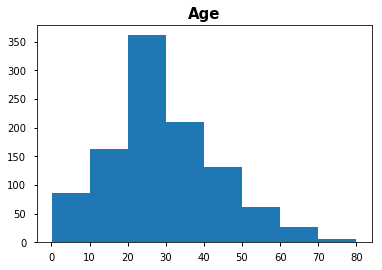

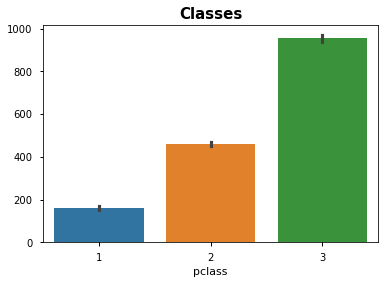

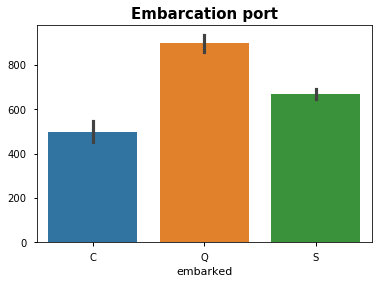

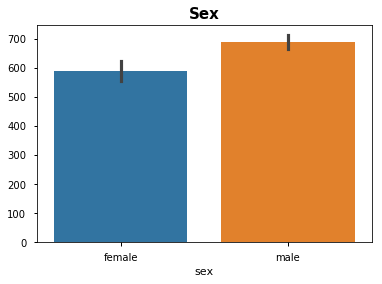

In [183]:
fig, ax = plt.subplots()
ax.set_title('Age', fontsize=15, fontweight='bold')
ax.hist(df.age.dropna(), label='Age', bins=8)
nice_bar_plot('Classes', df.pclass)
nice_bar_plot('Embarcation port', df.embarked)
nice_bar_plot('Sex', df.sex)

#### 3. Passenger distribution by cabin floor

([<matplotlib.patches.Wedge at 0x11a279940>,
  <matplotlib.text.Text at 0x116ef8c50>])

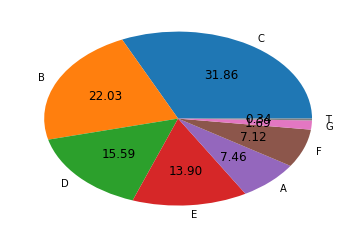

In [184]:
pie_data = df['deck'].value_counts().drop('?')
plt.pie(pie_data, labels=pie_data.index.values, autopct='%.2f')

#### 4.1. Survival rate of first class passengers

([<matplotlib.patches.Wedge at 0x116d7bd68>,
  <matplotlib.text.Text at 0x11a8543c8>])

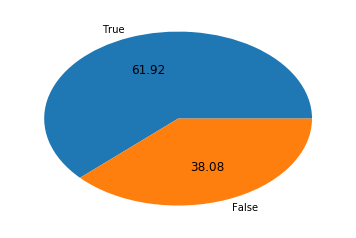

In [185]:
pie_class1 = df[df.pclass == 1]['survived'].value_counts()
plt.pie(pie_class1, labels = pie_class1.index.values, autopct='%.2f')

#### 4.2. Survival rate of second class passengers

([<matplotlib.patches.Wedge at 0x11a280c50>,
  <matplotlib.text.Text at 0x116c1d908>])

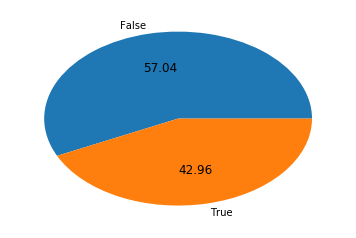

In [186]:
pie_class2 = df[df.pclass == 2]['survived'].value_counts()
plt.pie(pie_class2, labels = pie_class2.index.values, autopct='%.2f')

#### 4.3. Survival rate of third class passengers

([<matplotlib.patches.Wedge at 0x11a40f6a0>,
  <matplotlib.text.Text at 0x116f672e8>])

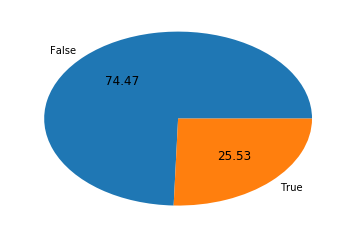

In [187]:
pie_class3 = df[df.pclass == 3]['survived'].value_counts()
plt.pie(pie_class3, labels = pie_class3.index.values, autopct='%.2f')

Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

In [188]:
df_intsurv = df[['survived']].copy()
df_intsurv['survived'] = df_intsurv.survived.astype('int')
class_sex_grouped = df_intsurv.groupby([df.pclass, df.sex])
class_sex_grouped.mean()

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

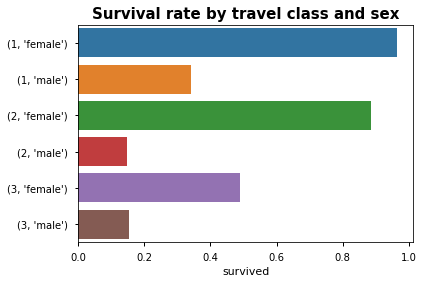

In [189]:
nice_bar_plot('Survival rate by travel class and sex', class_sex_grouped.mean().survived)

Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

In [190]:
agedf = df[['name','age', 'pclass', 'sex', 'survived']].sort_values('age').dropna().copy().reset_index(drop=True)
agedf['survived'] = agedf.survived.astype('int')
age_category = pd.Series(([0] * (agedf.shape[0] // 2)) + ([1] * (agedf.shape[0] // 2)))
agedf['age_category'] = age_category
age_grouped = agedf[['name', 'pclass', 'sex', 'survived']].groupby([agedf.age_category, agedf.pclass, agedf.sex])
age_grouped.mean()

survived
age_category pclass sex             
0            1      female  0.951220
                    male    0.500000
             2      female  0.905660
                    male    0.225352
             3      female  0.518519
                    male    0.186364
1            1      female  0.967391
                    male    0.314050
             2      female  0.880000
                    male    0.080460
             3      female  0.363636
                    male    0.139535